<a href="https://colab.research.google.com/github/Sunnyg83/Customer_Segmentation_ML/blob/main/Customer_Segmentation_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Segment_Mall_Data (1).csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.rename(columns={"Genre" : "Gender"}, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [10]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<ipython-input-12-c20118ea5575>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)


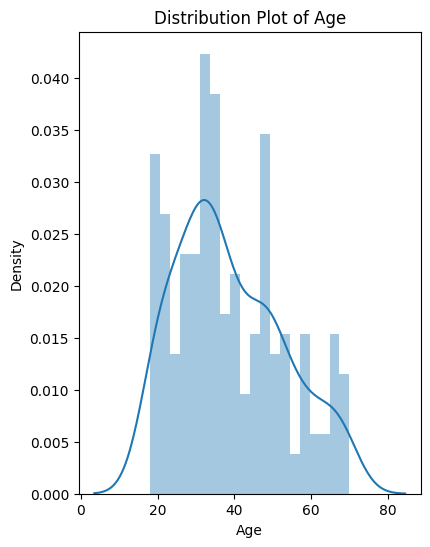

<ipython-input-12-c20118ea5575>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)


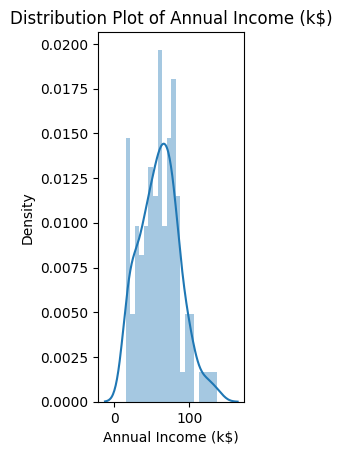

<ipython-input-12-c20118ea5575>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)


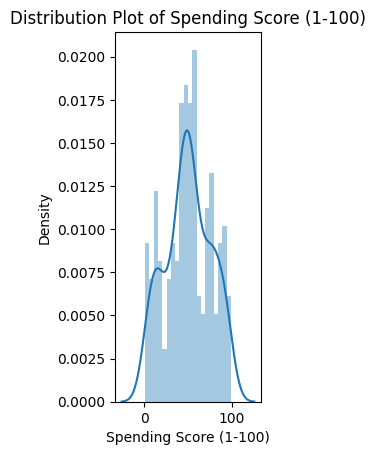

In [12]:
# creating a distribution plot for Age, Annual Income, and Spending Score

plt.figure(figsize=(15, 6))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n = n + 1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=.5, wspace = .2)
  sns.distplot(df[x], bins = 20)
  plt.title("Distribution Plot of {}".format(x))
  plt.show()

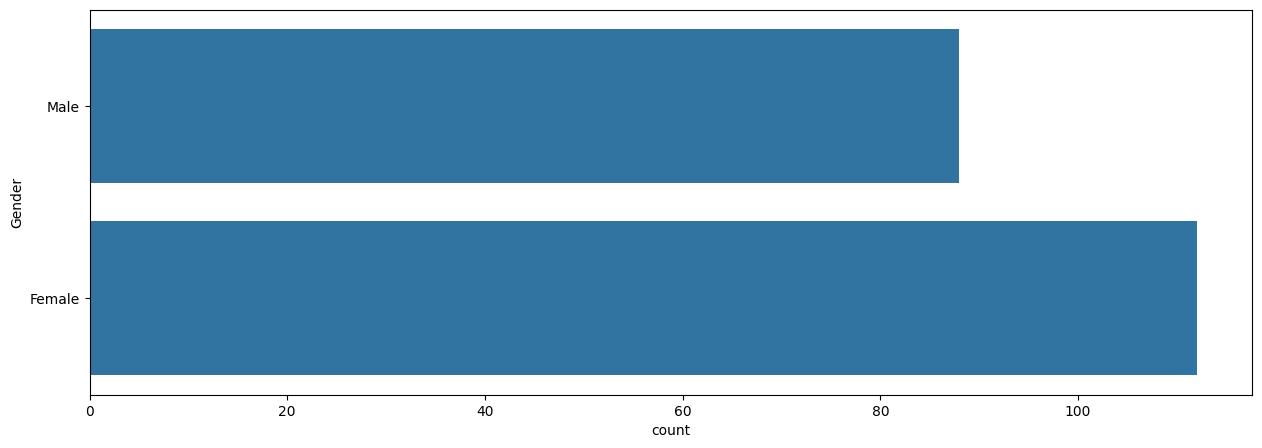

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(y= "Gender",data=df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

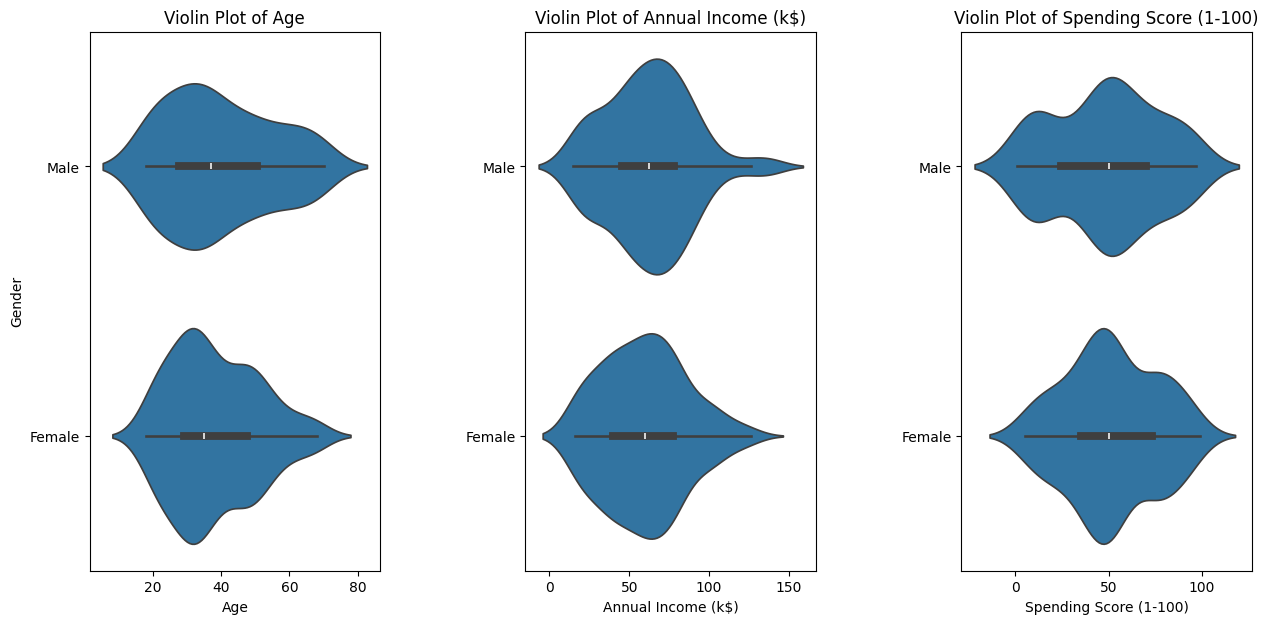

In [14]:

plt.figure(1, figsize=(15, 7))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n = n+ 1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=.5, wspace = .5)
  sns.violinplot(x=cols, y="Gender", data=df)
  plt.ylabel('Gender' if n == 1 else '')
  plt.title('Violin Plot of {}'.format(cols))
plt.show

<ipython-input-15-8e12ffa9e46e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex, y=agey, palette="flare")


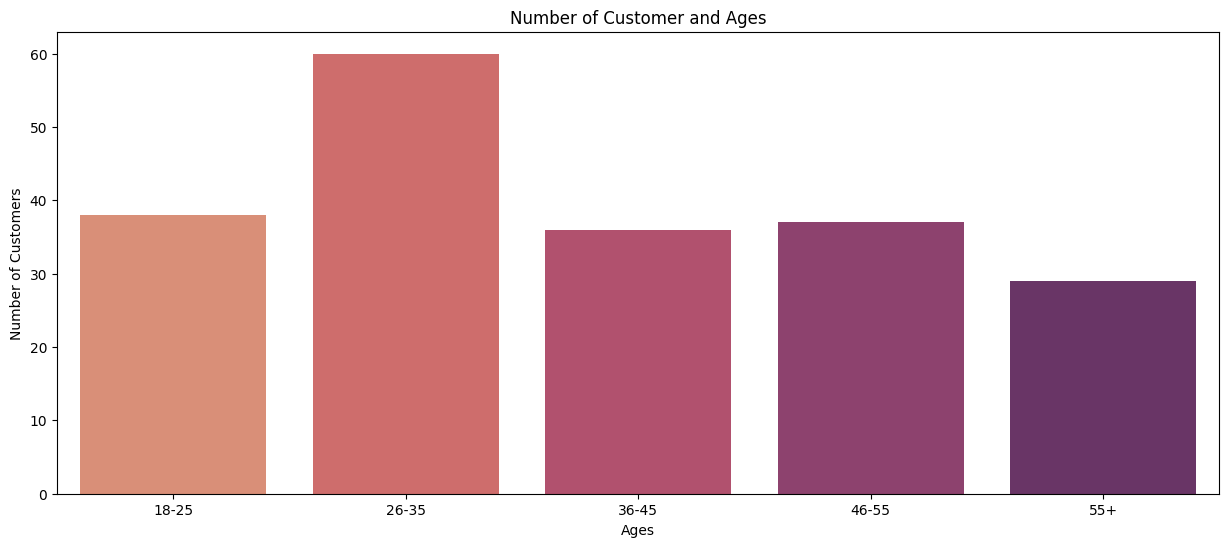

In [15]:
age_18_25 = df.Age[(df.Age <= 25) & (df.Age >=18)]
age_26_35 = df.Age[(df.Age <= 35) & (df.Age >=26)]
age_36_45 = df.Age[(df.Age <= 45) & (df.Age >=36)]
age_46_55 = df.Age[(df.Age <= 55) & (df.Age >=46)]
age_55above = df.Age[df.Age >=56]

agex = ["18-25","26-35","36-45","46-55","55+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]



plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="flare")
plt.title("Number of Customer and Ages")
plt.xlabel("Ages")
plt.ylabel("Number of Customers")
plt.show()

Text(0.5, 1.0, 'Annual Income vs Spending Score')

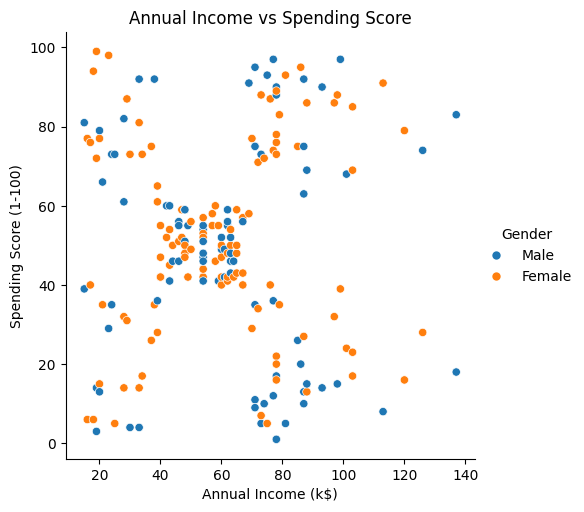

In [16]:
# visualizing the relationship between annual income and spending score

sns.relplot(x= "Annual Income (k$)", y= "Spending Score (1-100)", hue= "Gender", data=df)
plt.title("Annual Income vs Spending Score")

<ipython-input-17-2ae9d7fe034e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx, y=ssy, palette="mako")


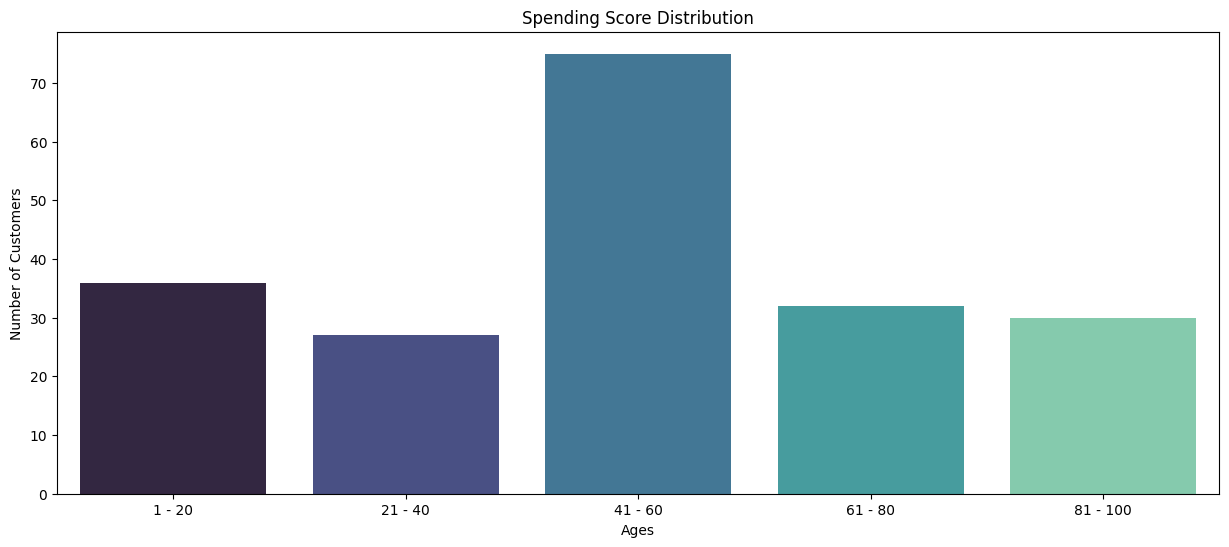

In [17]:
# visuializing distribution of spending score

ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] <= 20) & (df["Spending Score (1-100)"] >= 1)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] <= 40) & (df["Spending Score (1-100)"] >= 21)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] <= 60) & (df["Spending Score (1-100)"] >= 41)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] <= 80) & (df["Spending Score (1-100)"] >= 61)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] <= 100) & (df["Spending Score (1-100)"] >= 81)]

ssx = ["1 - 20","21 - 40","41 - 60","61 - 80","81 - 100"]
ssy = [len(ss1_20.values),len(ss21_40.values),len(ss41_60.values),len(ss61_80.values),len(ss81_100.values)]


plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="mako")
plt.title("Spending Score Distribution")
plt.xlabel("Ages")
plt.ylabel("Number of Customers")
plt.show()

<ipython-input-18-2ddb0f814b79>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ax, y=ay, palette="crest")


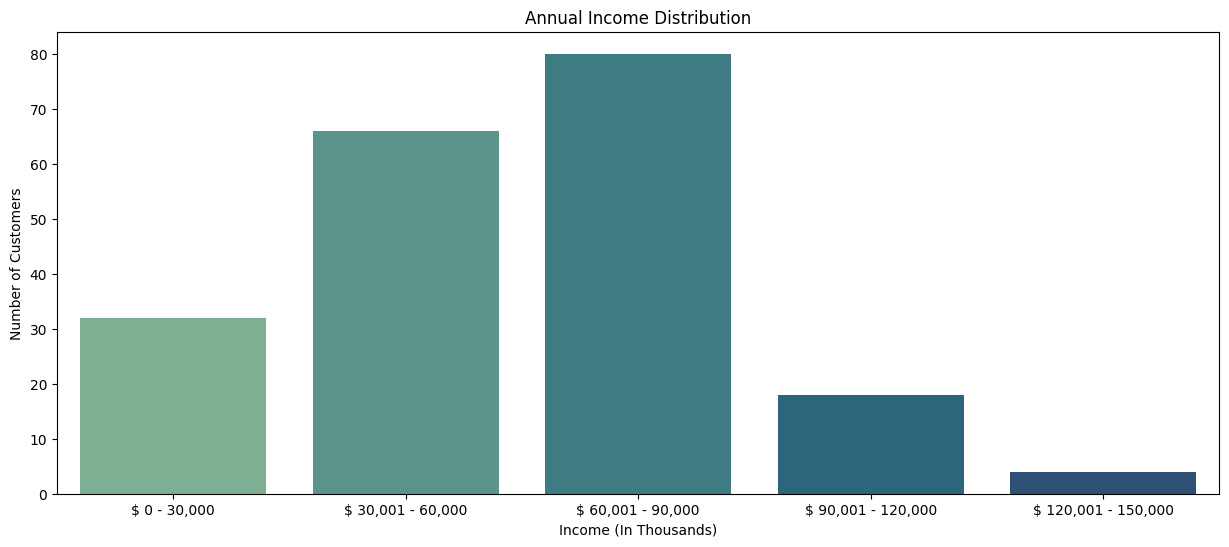

In [18]:
a0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] <= 30) & (df["Annual Income (k$)"] >= 0)]
a31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] <= 60) & (df["Annual Income (k$)"] >= 31)]
a61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] <= 90) & (df["Annual Income (k$)"] >= 61)]
a91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] <= 120) & (df["Annual Income (k$)"] >= 91)]
a121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] <= 150) & (df["Annual Income (k$)"] >= 121)]

ax = ["$ 0 - 30,000","$ 30,001 - 60,000","$ 60,001 - 90,000","$ 90,001 - 120,000","$ 120,001 - 150,000"]
ay = [len(a0_30.values),len(a31_60.values),len(a61_90.values),len(a91_120.values),len(a121_150.values)]


plt.figure(figsize=(15,6))
sns.barplot(x=ax, y=ay, palette="crest")
plt.title("Annual Income Distribution")
plt.xlabel("Income (In Thousands)")
plt.ylabel("Number of Customers")
plt.show()

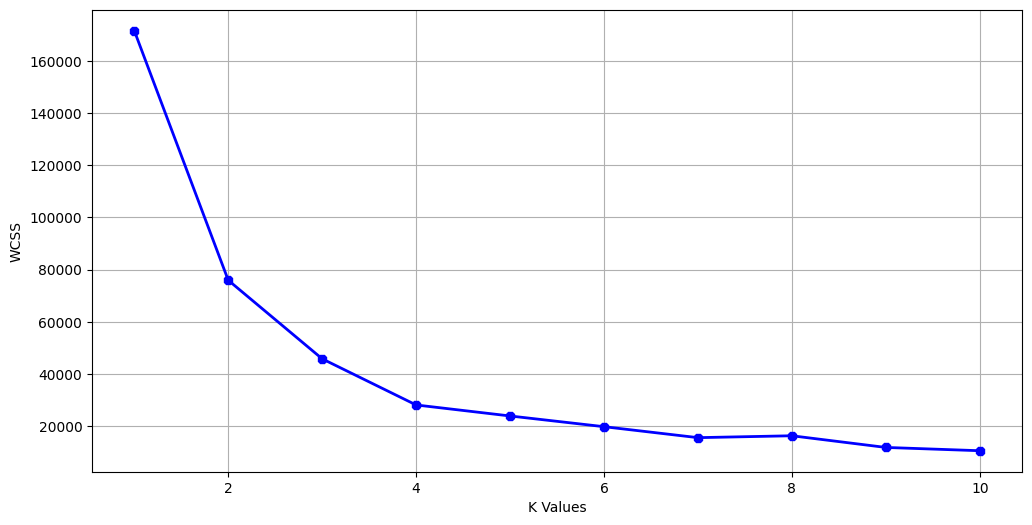

In [19]:
X1=df.loc[:, ["Age", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="blue", marker="8")
plt.xlabel("K Values")
plt.ylabel("WCSS")
plt.show()


In [20]:
kmeans = KMeans(n_clusters=4)

# predict the labels of clusters
label = kmeans.fit_predict(X1)

print(label)

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [21]:
print(kmeans.cluster_centers_)


[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


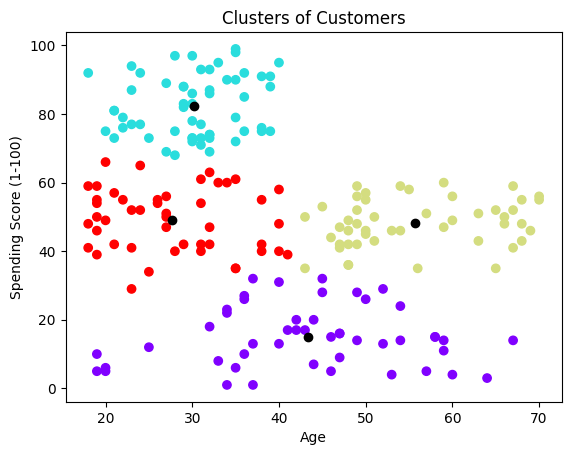

In [22]:
plt.scatter(X1[:,0], X1[:,1],c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

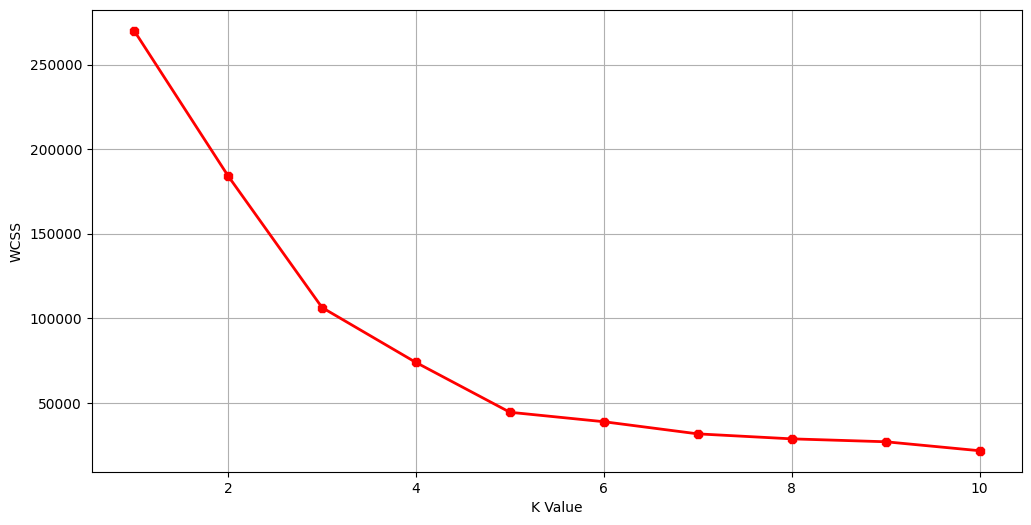

In [23]:
X2=df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [24]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 1 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


[[26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]]


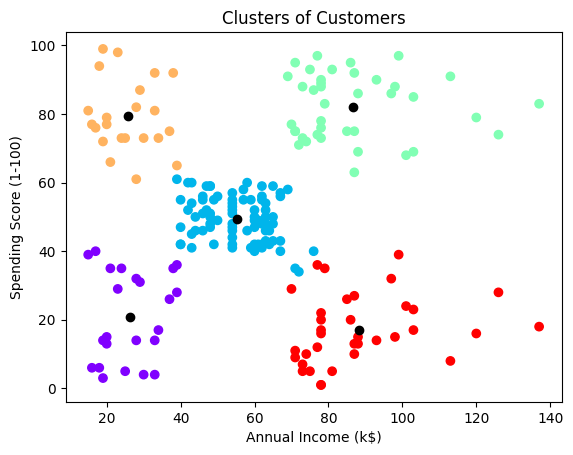

In [25]:
print(kmeans.cluster_centers_)

plt.scatter(X2[:,0], X1[:,1],c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

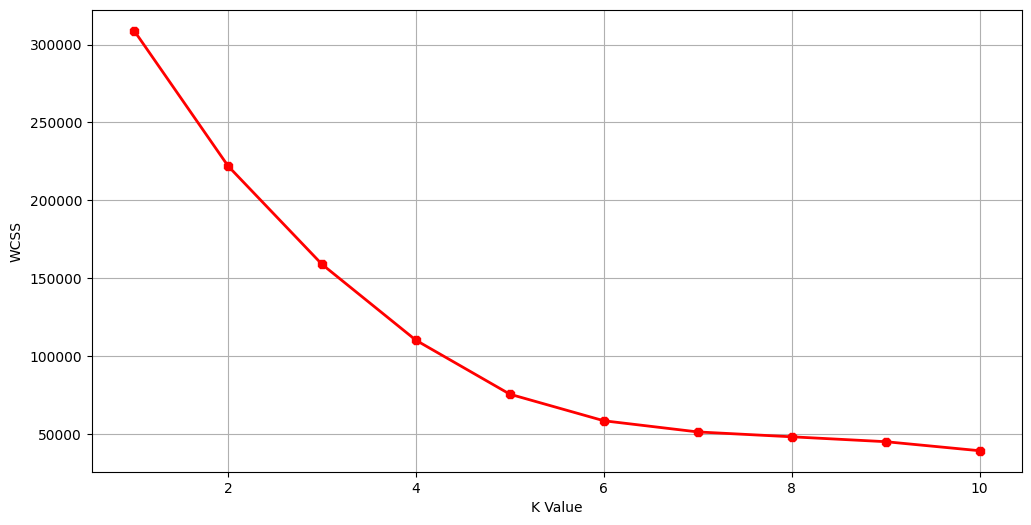

In [27]:
X3=df.iloc[:,1:]

encoded_data = pd.get_dummies(df, columns=['Gender'], drop_first=True)

X3 = encoded_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]


wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [28]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X3)

print(label)


[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0
 1 1 1 1 1 0 1 1 1 1 1 1 4 1 4 1 4 3 4 3 4 1 4 3 4 3 4 3 4 3 4 1 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]


In [29]:
print(kmeans.cluster_centers_)

[[54.06       40.46       36.72        0.44      ]
 [33.39622642 58.05660377 48.77358491  0.35849057]
 [25.25       25.83333333 76.91666667  0.41666667]
 [41.64705882 88.73529412 16.76470588  0.55882353]
 [32.69230769 86.53846154 82.12820513  0.46153846]]


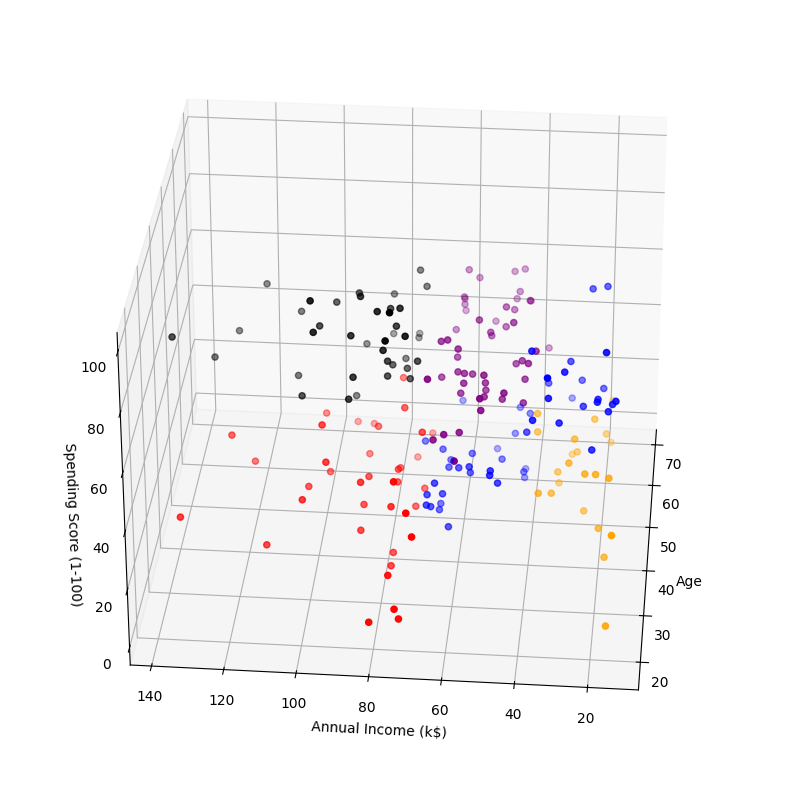

In [31]:
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue')
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red')
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='black')
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange')
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple')
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [33]:
from sklearn.cluster import KMeans

kmeans_k1 = KMeans(n_clusters=1)  # Create a KMeans object with 1 cluster
kmeans_k1.fit(X3)  # Fit the model to your data (X3)
wcss_k1 = kmeans_k1.inertia_  # Get the WCSS for k=1

kmeans_optimal = KMeans(n_clusters=5) # Assuming 5 is your optimal k
kmeans_optimal.fit(X3)
wcss_optimal = kmeans_optimal.inertia_
variance_reduction = ((wcss_k1 - wcss_optimal) / wcss_k1) * 100
print(f"Variance reduction: {variance_reduction:.2f}%")

Variance reduction: 73.24%
